In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('../data/diabetic_data.csv')

In [3]:
raw_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [4]:
len(raw_data.columns)

50

In [5]:
raw_data.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


It seems that `raw_data.head()` does not offer such valuable knowledge. The first thing we notice is that NaN values for feature `weight` are represented by `?`. Secondly, feature `age` is represented as a series of lists with values from 0 to 100 with step 10. We may consider converting `age` to integer.

Let us analyze the data in a more detailed way:

Below, we print the unique values that a feature can take and their counts. The results are stored in `unique_values_counts.txt`.
We separated the features such that the ones with too many unique values are ignored.

In [88]:
threshold = 0.10 * len(raw_data)

columns_with_less_unique_values = []

for column in raw_data.columns:
    unique_values_count = raw_data[column].nunique()
    if unique_values_count > threshold:
        columns_with_less_unique_values.append((column, unique_values_count))

selected_columns = [col for col, _ in columns_with_less_unique_values]
print("Columns with too many unique values:")

with open('../conclusions/unique_values_counts.txt', 'w') as file:
    for column in raw_data.columns:
        if column not in selected_columns:
            file.write(f"\nUnique values and counts for column '{column}':\n")
            file.write(f"{raw_data[column].value_counts()}\n")
        else:
            print(column, raw_data[column].nunique())

Columns with too many unique values:
encounter_id 101766
patient_nbr 71518


In [89]:
print('There are', len(raw_data['patient_nbr'].unique()), 'unique patients in the data, out of', len(raw_data['encounter_id'].unique()))

There are 71518 unique patients in the data, out of 101766


Everytime the patient visits the hospital, it is called as encounter, that's why we have multiple encounters per patient.

In [90]:
len(raw_data['encounter_id'].unique())/len(raw_data['patient_nbr'].unique())

1.4229424760200229

The majority of the patients will have only 1 encounter in the data.

Next, we see that the values of the label (column 'readmitted') are imbalanced.

In [91]:
raw_data['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

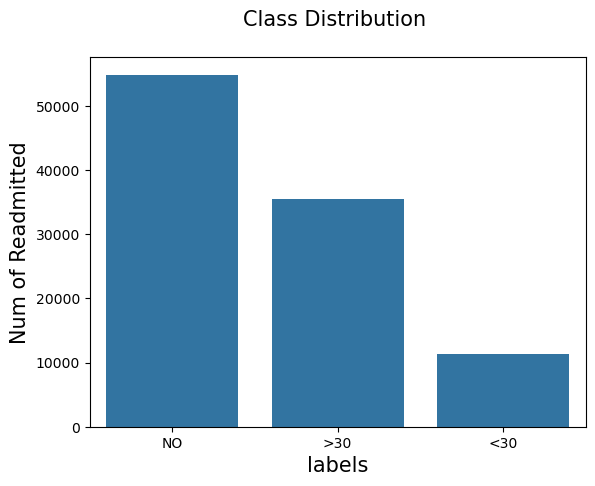

In [13]:
ax = sns.barplot(x=raw_data['readmitted'].value_counts().index, y=raw_data['readmitted'].value_counts())
plt.xlabel('labels', size = 15)
plt.ylabel('Num of Readmitted', size = 15)
plt.title('Class Distribution \n', size = 15)
plt.show()

We can see that we have 3 categories and we want this to be a binary classification problem. Will the patient be readmitted? yes/no
Therefore, we will group the '>30' and '<30' into the same 'YES' category. This will later be encoded into 0 and 1.

In [8]:
def change_cat(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'
    
raw_data['readmitted_2'] = raw_data['readmitted'].apply(change_cat) 

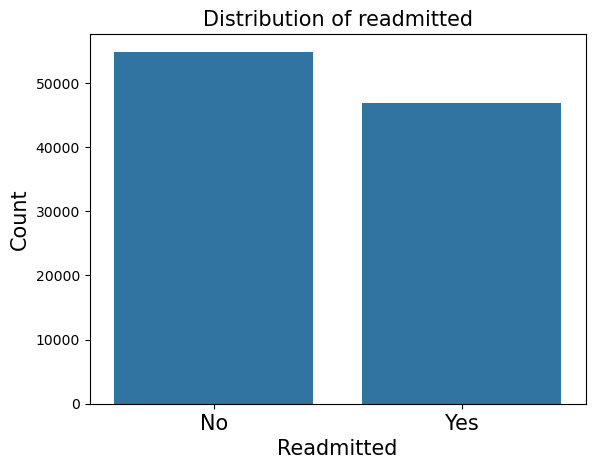

In [12]:
ax = sns.countplot(x='readmitted_2', data=raw_data)
plt.xlabel('Readmitted', size = 15)
plt.xticks(size = 15)
plt.ylabel('Count', size = 15)
plt.title('Distribution of readmitted', size=15)
plt.show()

Now we have a more balanced dataset that would better fit this task :)

We want to further inspect the 'weight' column, as it appear to have many missing values, described by '?'.

In [15]:

print(raw_data['weight'].describe())

count     101766
unique        10
top            ?
freq       98569
Name: weight, dtype: object


Due to the fact that from 101766 instances, the most frequent one is indeed '?', having 98569 values, we will drop this column in one of the preprocessing methods.

Usually gender is really important when determining a medical diagnose, as the health parameter varies for females and males.

In [16]:
raw_data['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

There are some people whose gender is unknow, we will drop these rows as there are only 3 instances.

In [17]:
raw_data.drop(raw_data[raw_data['gender'] == 'Unknown/Invalid'].index, inplace = True)

In [18]:
raw_data.reset_index(inplace = True, drop = True)

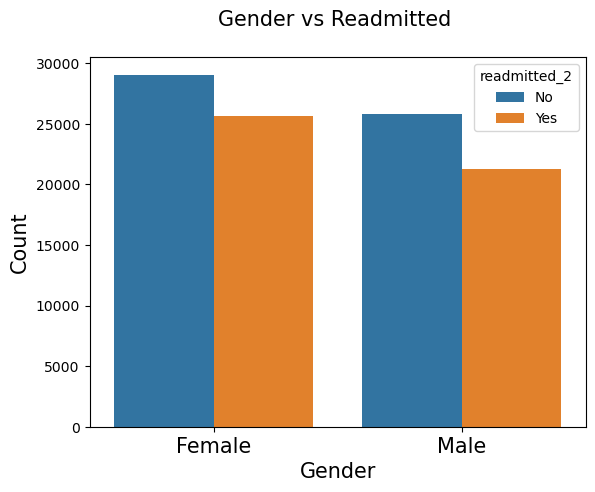

In [19]:
ax = sns.countplot(x="gender", hue="readmitted_2", data=raw_data)
plt.xlabel('Gender', size = 15)
plt.xticks(size = 15)
plt.ylabel('Count', size = 15)
plt.title('Gender vs Readmitted \n', size = 15)
plt.show()

Age could be a really crucial factor to the final prediction. We will inspect its distribution.

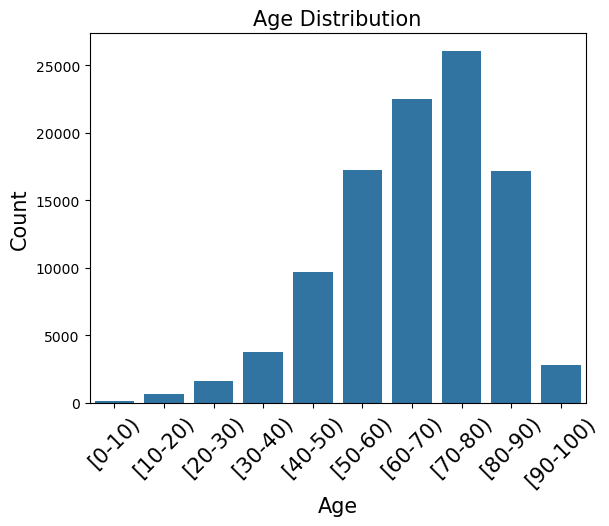

In [20]:
ax = sns.countplot(x='age', data= raw_data)
plt.xlabel('Age', size = 15)
plt.xticks(rotation=45, size = 15)
plt.ylabel('Count', size = 15)
plt.title('Age Distribution', size = 15)
plt.show()

As expected, elderly people have a higher change of having health problems.

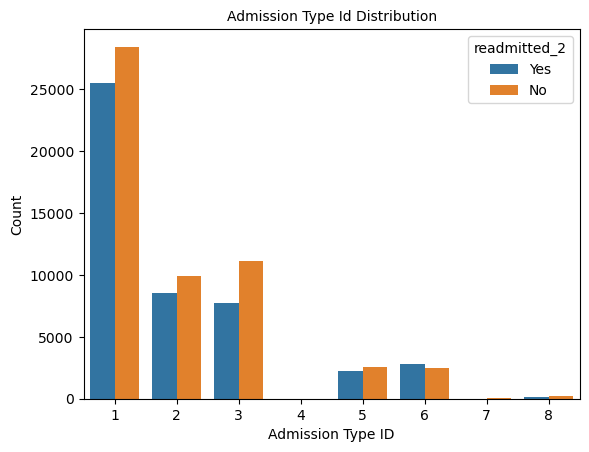

In [21]:
ax = sns.countplot(x='admission_type_id', hue='readmitted_2', data=raw_data)
plt.xlabel('Admission Type ID', size=10)
plt.xticks(size=10)
plt.ylabel('Count', size=10)
plt.title('Admission Type Id Distribution', size = 10)
plt.show()

We will keep this column as it appears that patients being registered with admission type id == 1 have the highest chances to be readmitted.

Moreover, columns like encounter_id and patient_nbr typically contain unique identifiers for each encounter or patient. These identifiers do not carry meaningful information for predicting outcomes and are not useful for training the model, so these columns will also be dropped during the preprocessing part

In [102]:
print(raw_data['payer_code'].describe())

count     101763
unique        18
top            ?
freq       40255
Name: payer_code, dtype: object


For the 'payer_code' appears to be almost the same situation as for the 'weight' column. It will also be dropped, otherwise it will introduce noise.

In [103]:
print(raw_data['medical_specialty'].describe())

count     101763
unique        73
top            ?
freq       49947
Name: medical_specialty, dtype: object


The "Medical specialty" column contains an integer identifier representing the admitting physician's specialty, such as cardiology or surgery. However, since this information is missing in nearly 50% of cases and there are 73 unique values, it's not practical to impute the missing values. Therefore, we'll drop this column from our analysis.

In [104]:
print(raw_data[['admission_type_id', 'admission_source_id', 'discharge_disposition_id']].describe())

       admission_type_id  admission_source_id  discharge_disposition_id
count      101763.000000        101763.000000             101763.000000
mean            2.024017             5.754459                  3.715515
std             1.445414             4.064110                  5.279919
min             1.000000             1.000000                  1.000000
25%             1.000000             1.000000                  1.000000
50%             1.000000             7.000000                  1.000000
75%             3.000000             7.000000                  4.000000
max             8.000000            25.000000                 28.000000


These columns may not directly provide clinical information about the patient's condition, treatment, or health outcomes, but they can serve as important contextual features. For example, the type of admission (e.g., emergency vs. elective) might impact the severity of the patient's condition or the urgency of treatment. Therefore we will keep them.

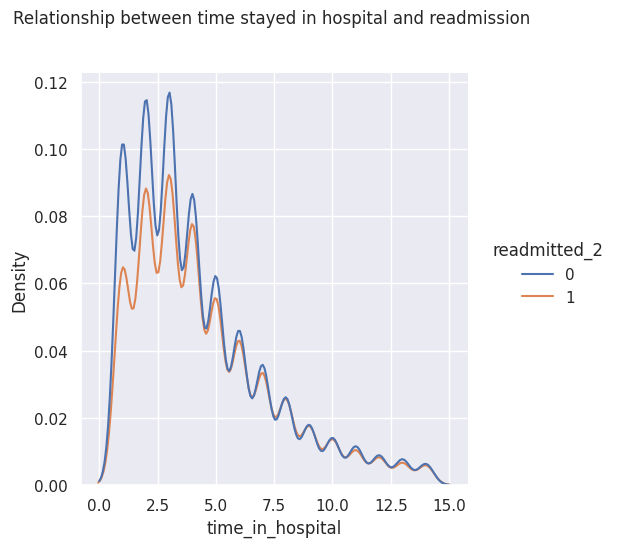

In [105]:
sns.set(rc={'figure.figsize':(18, 10)})
sns.displot(raw_data, x="time_in_hospital", hue = 'readmitted_2', kind="kde")
plt.title('Relationship between time stayed in hospital and readmission \n\n', size  = 12)
plt.show()

We observe that there is no significant difference between readmitted and not readmitted given by the time spent in the hospital. It doesn't add any value to our training process. We can say the same thing about the number of lab procedures (demonstrated by the figure below).

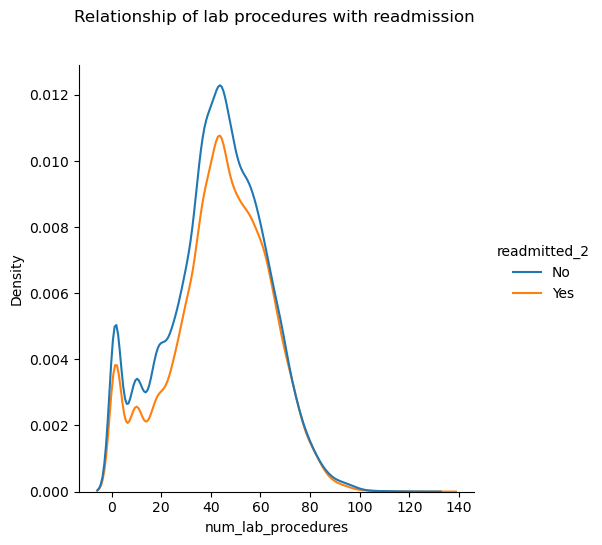

In [22]:
sns.displot(raw_data, x="num_lab_procedures", hue= 'readmitted_2', kind="kde")
plt.title('Relationship of lab procedures with readmission \n\n', size = 12)
plt.show()

In [107]:
print(raw_data['race'].describe())
unique_values = raw_data['race'].unique()
print("Unique values in 'race' column:", unique_values)

count        101763
unique            6
top       Caucasian
freq          76099
Name: race, dtype: object
Unique values in 'race' column: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


In [108]:
value_counts = raw_data['race'].value_counts(dropna=False)
print("Value counts for 'race' column:")
print(value_counts)

Value counts for 'race' column:
race
Caucasian          76099
AfricanAmerican    19210
?                   2271
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64


This feature is not be representative of the overall population as it significantly overrepresents one racial or ethnic group. This could introduce bias into the analysis, as findings may not generalize well to more diverse populations. Moreover, doe to ethical considerations, we will also drop this column. 

We will examine another interesting feature, namely the number of emergency visits.

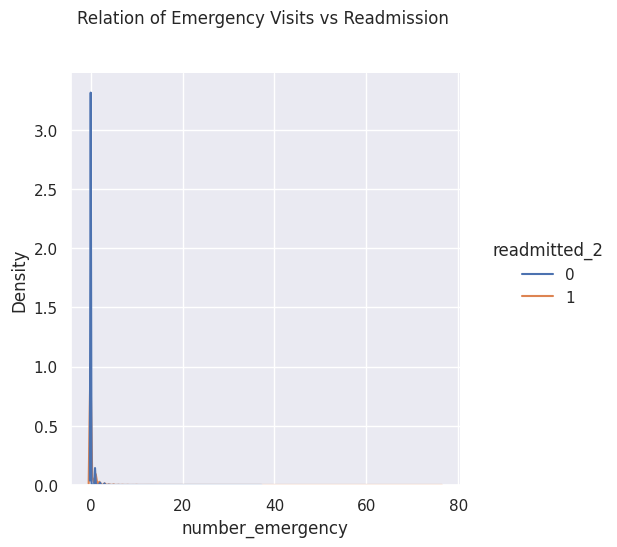

In [109]:
sns.displot(raw_data, x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relation of Emergency Visits vs Readmission \n\n', size = 12)
plt.show()

We observed that the majority of the patients have 0 emergency visits. We want to analyse this in more detail.

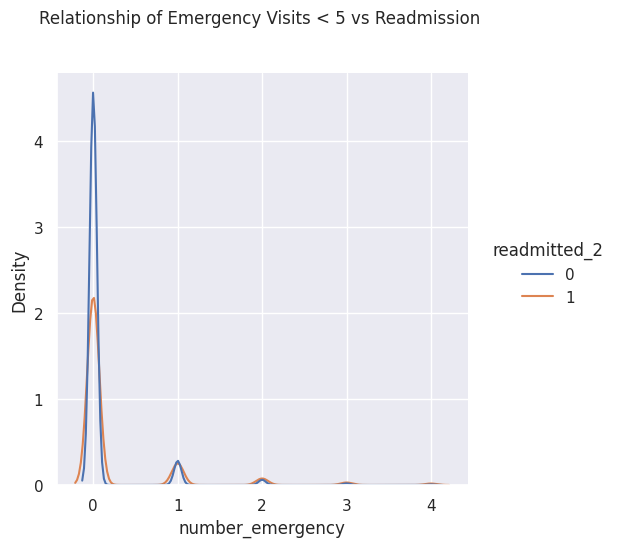

In [110]:
sns.displot(raw_data.loc[raw_data['number_emergency']<5], x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relationship of Emergency Visits < 5 vs Readmission \n\n', size = 12)
plt.show()

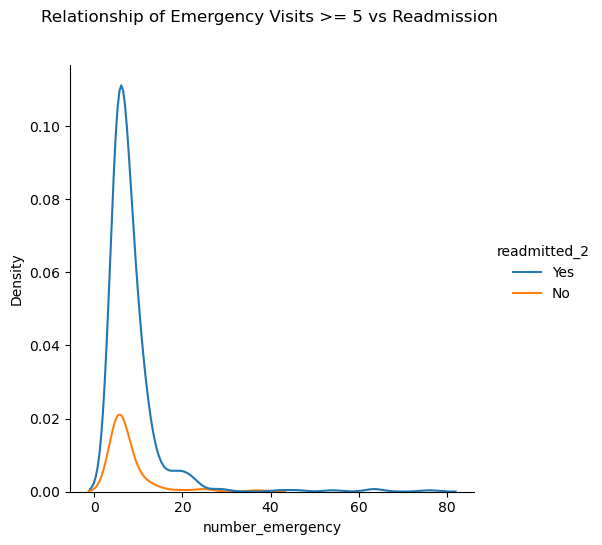

In [23]:
sns.displot(raw_data.loc[raw_data['number_emergency']>=5], x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relationship of Emergency Visits >= 5 vs Readmission \n\n', size = 12)
plt.show()

We observed that the majority of the patients that have near 10 emergency visits and are more likely to be readmitted to hospital. We can conclude that, if the number of emergency visits increases, the patient most likely will be remitted to the hospital, so this is a relevant feature.

In [112]:
num_instances = raw_data.shape[0]
num_instances

101763

In [113]:
num_question_marks = (raw_data['diag_1'] == '?').sum()
percent_question_marks_diag_1 = (num_question_marks / num_instances) * 100

print("Number of values containing '?' in the 'diag_1' column:", num_question_marks)
print("Percentage of '?' values in the 'diag_1' column:", percent_question_marks_diag_1)

Number of values containing '?' in the 'diag_1' column: 21
Percentage of '?' values in the 'diag_1' column: 0.020636184074761945


In [114]:
num_question_marks_2 = (raw_data['diag_2'] == '?').sum()
percent_question_marks_diag_2 = (num_question_marks_2 / num_instances) * 100

print("Number of values containing '?' in the 'diag_2' column:", num_question_marks_2)
print("Percentage of '?' values in the 'diag_2' column:", percent_question_marks_diag_2)

Number of values containing '?' in the 'diag_2' column: 358
Percentage of '?' values in the 'diag_2' column: 0.35179780470308464


In [115]:
num_question_marks_3 = (raw_data['diag_3'] == '?').sum()
percent_question_marks_diag_3 = (num_question_marks_3 / num_instances) * 100

print("Number of values containing '?' in the 'diag_3' column:", num_question_marks_3)
print("Percentage of '?' values in the 'diag_3' column:", percent_question_marks_diag_3)

Number of values containing '?' in the 'diag_3' column: 1423
Percentage of '?' values in the 'diag_3' column: 1.3983471399231548


We can easily see that only 0.02%, 0.35% and 1.39% respectively of datapoints contain '?'. This values will be imputed by using the most common diagnostic.

In [116]:
value_counts = raw_data['examide'].value_counts(dropna=False)
print("Value counts for 'examide' column:")
print(value_counts)

Value counts for 'examide' column:
examide
No    101763
Name: count, dtype: int64


We will also drop the 'examide' column as it only contains the same value for each instance, so it won't help in the training process.

In [117]:
value_counts = raw_data['citoglipton'].value_counts(dropna=False)
print("Value counts for 'citoglipton' column:")
print(value_counts)

Value counts for 'citoglipton' column:
citoglipton
No    101763
Name: count, dtype: int64


In [118]:
value_counts = raw_data['acetohexamide'].value_counts(dropna=False)
print("Value counts for 'acetohexamide' column:")
print(value_counts)

Value counts for 'acetohexamide' column:
acetohexamide
No        101762
Steady         1
Name: count, dtype: int64


We want to examine the correlation between medicines prescribed and the remission status.

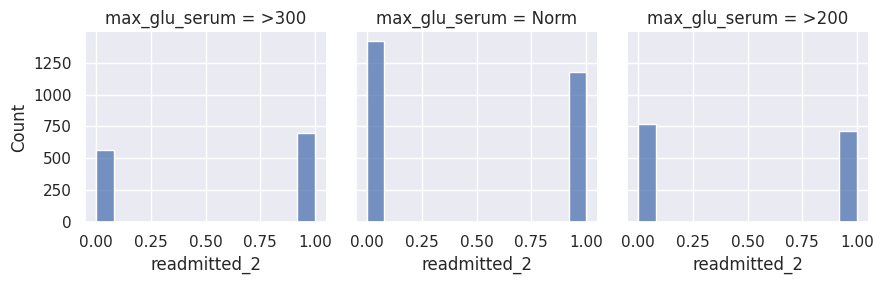

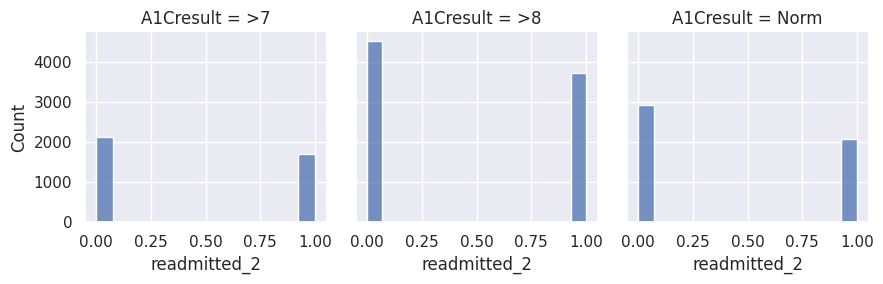

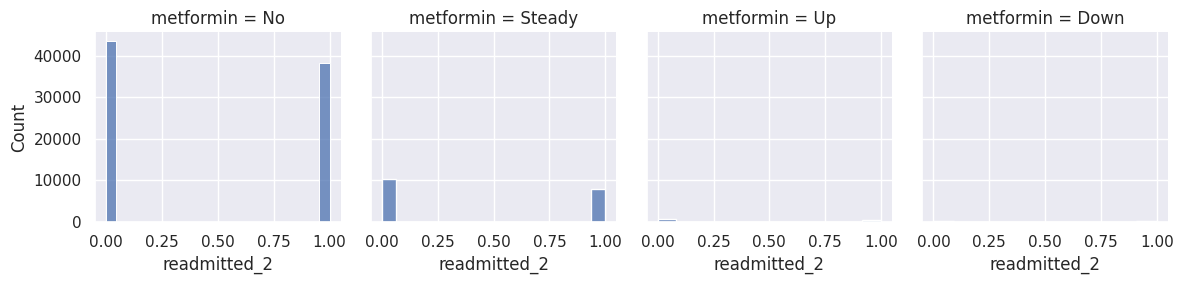

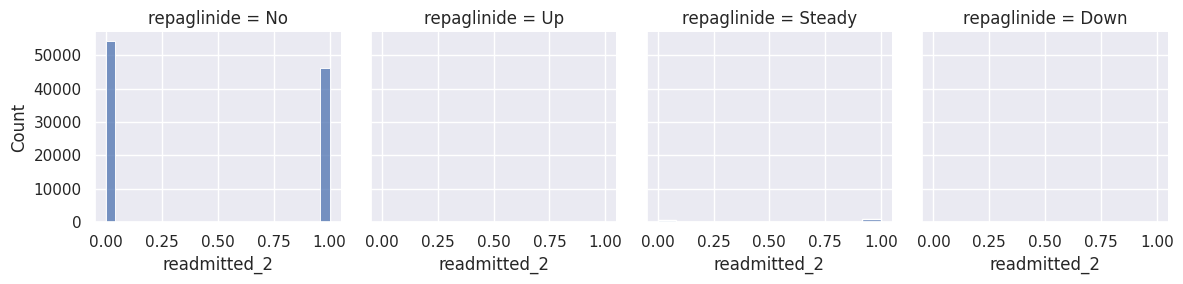

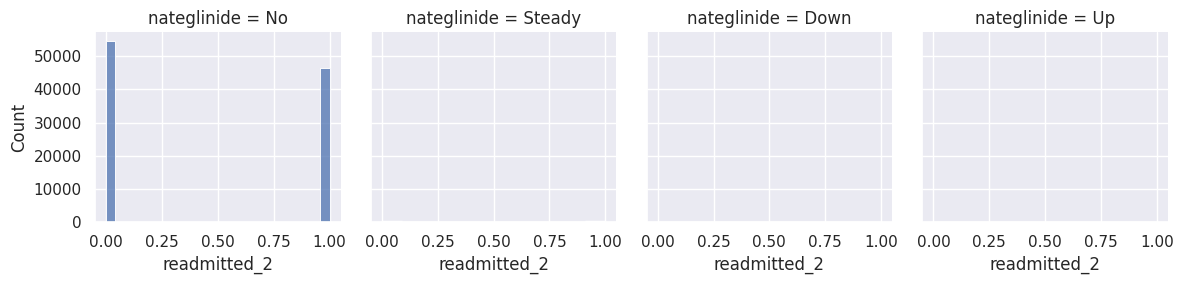

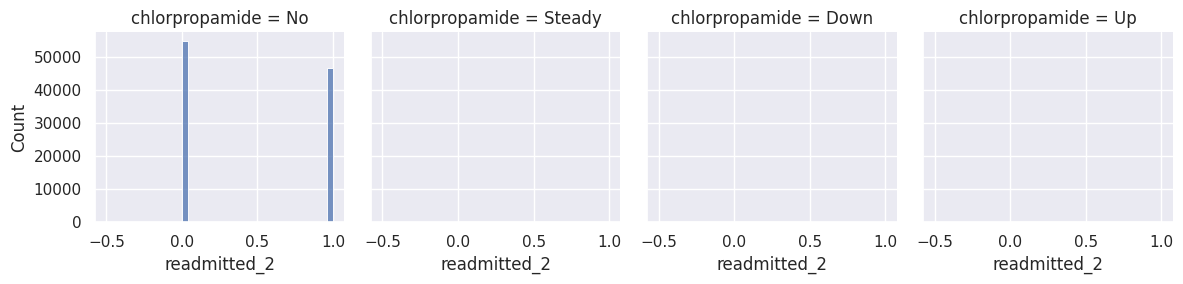

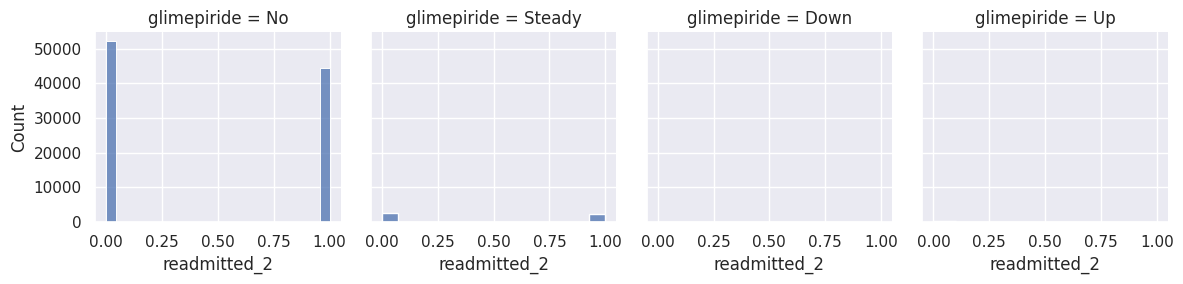

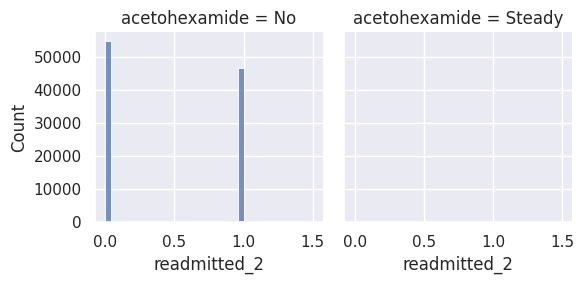

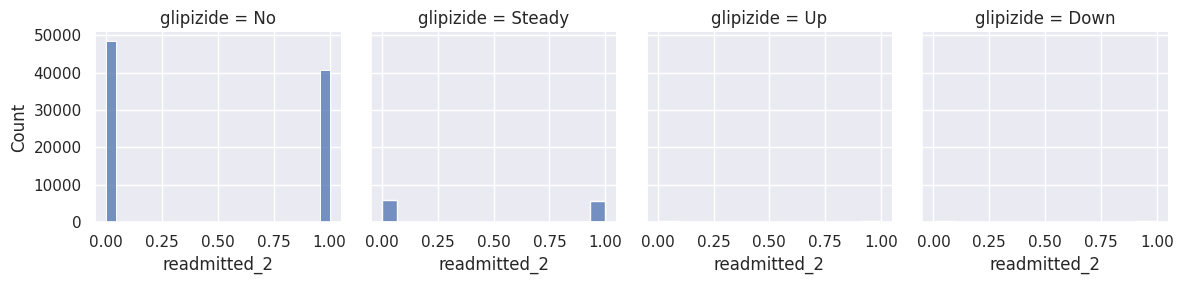

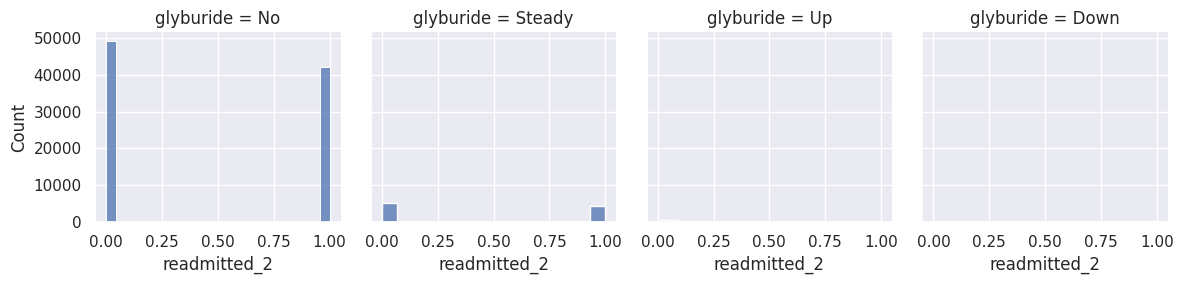

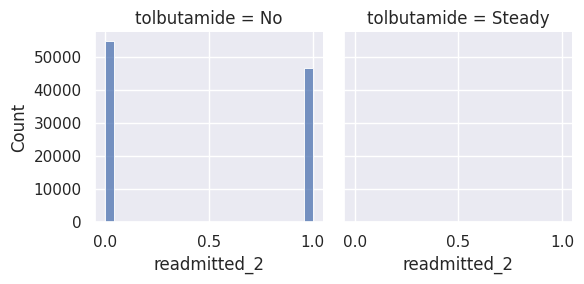

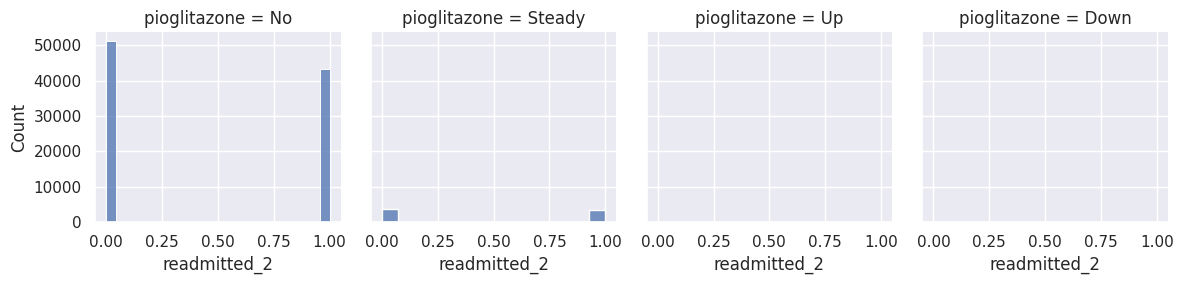

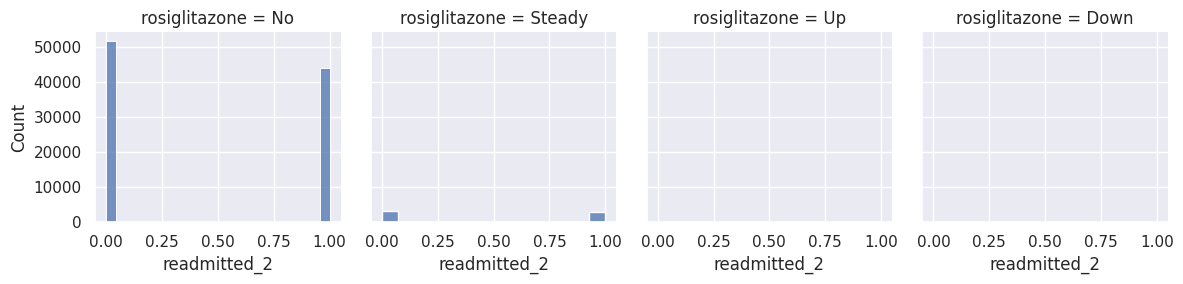

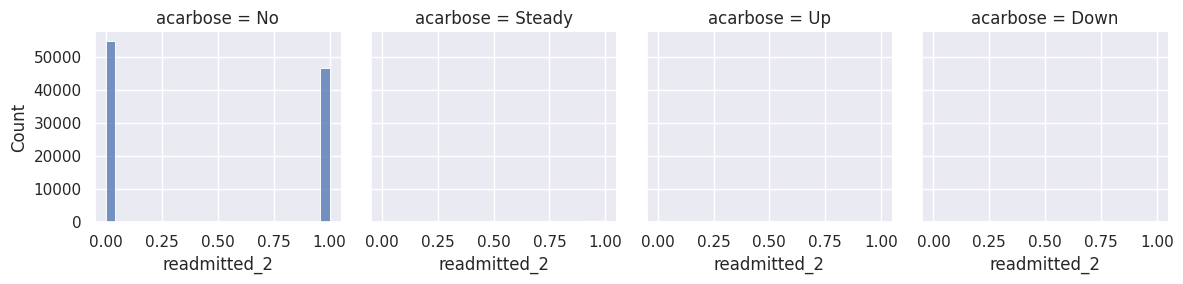

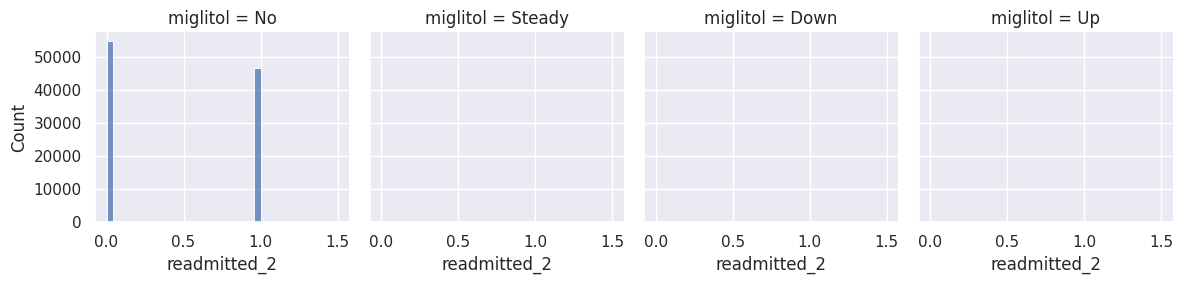

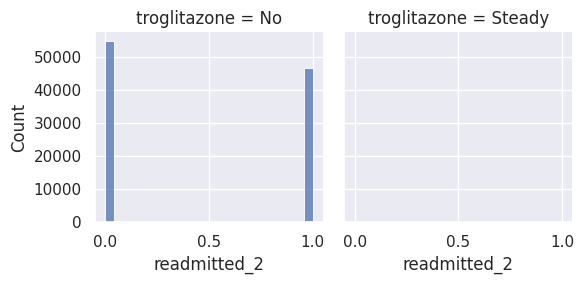

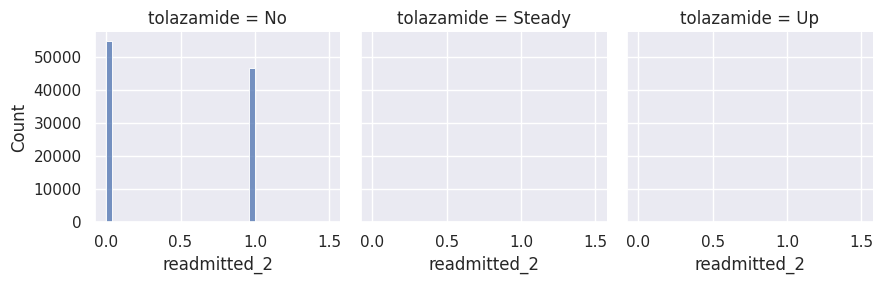

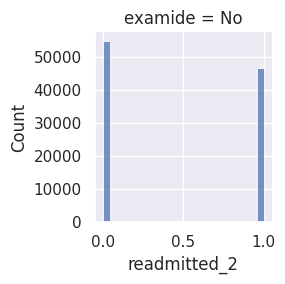

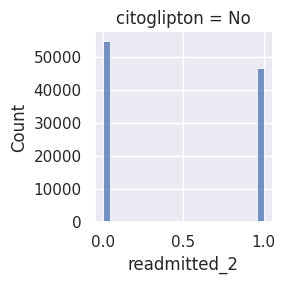

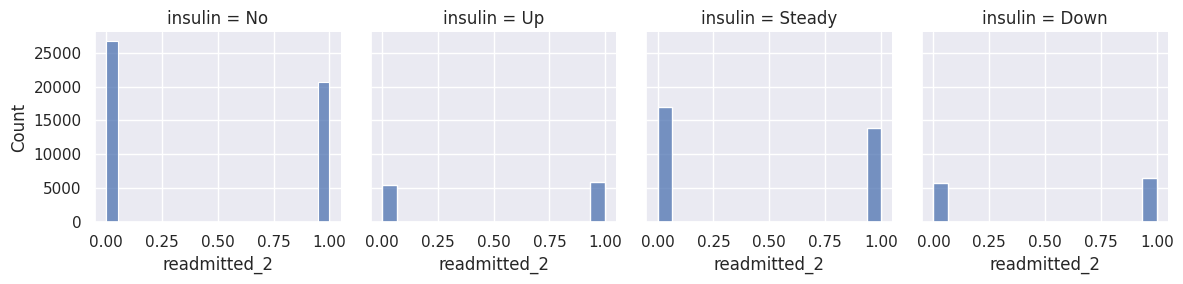

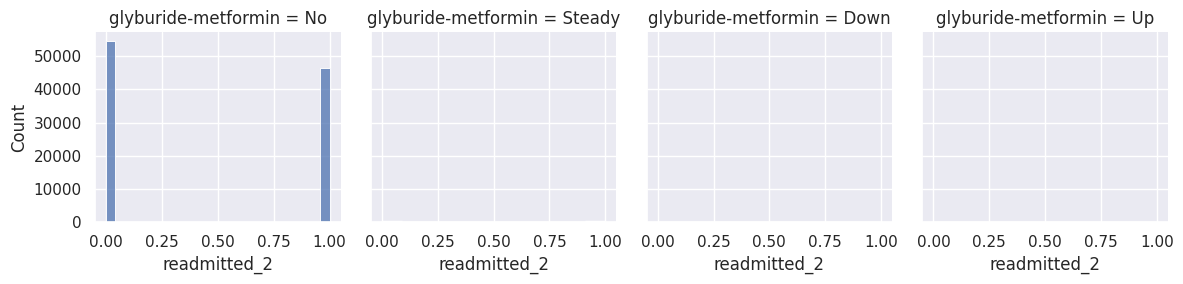

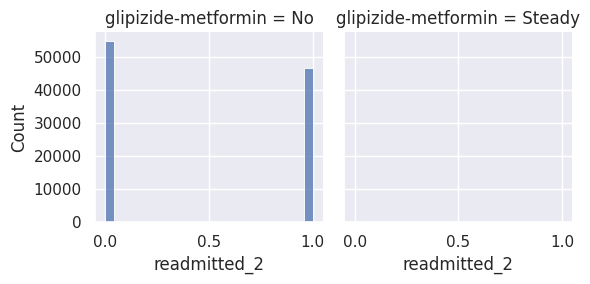

In [119]:
for columnName in raw_data.iloc[:, 22:44].columns:
    g = sns.FacetGrid(raw_data, col=columnName)
    g.map(sns.histplot, "readmitted_2")
    plt.show()

Therefore more columns will be dropped in the preprocessing phase, as it appears that the vast majority of medicines are not given to the patients.

We'll check if other columns contain missing values.

In [120]:
for i in raw_data.columns:
    print(i, raw_data[raw_data[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 2271
gender 0
age 0
weight 98566
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40255
medical_specialty 49947
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0
readmitted_2 0


There are no columns containing missing or unspecified values besides these. In the preprocessing part, we will also factorize object-type columns and then proceed with training four different models.